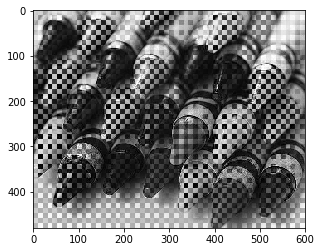

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_img(a):
    img = cv2.imread(a)
    return img

def display_img(img,cmap=None):
    plt.imshow(img,cmap)
    
#Mosaic image
i=load_img('image_set/crayons_mosaic.bmp')
toshow=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
display_img(toshow)    

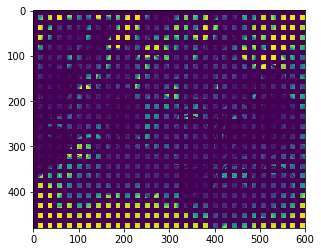

In [38]:
#converted to float32 so that later it can avoid 0 value when it's divided.
i=np.float32(i)
b,g,r=cv2.split(i)

#linear interpolation for each color
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        if i%2 ==0 and j%2 ==0:
           b[i][j]=b[i][j]
        else:
            b[i][j]=0
            
display_img(b)            
        

True

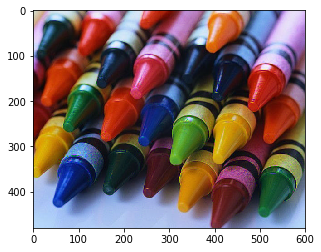

In [39]:

for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        if i%2 ==0 and j%2 ==1:
           r[i][j]=r[i][j]
        elif i%2 ==1 and j%2 ==0:
           r[i][j]=r[i][j]
        else:
            r[i][j]=0
            
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if i%2 ==1 and j%2 ==1:
           g[i][j]=g[i][j]
        else:
            g[i][j]=0
 #Three kernel for each RGB           
kb=np.array([[.25,.5,.25],[.5,1,.5],[.25,.5,.25]]) 
kg=np.array([[.25,.5,.25],[.5,1,.5],[.25,.5,.25]]) 
kr=np.array([[0,.25,0],[.25,1,.25],[0,.25,0]]) 

b1 = cv2.filter2D(b,-1, kb) 
g1 = cv2.filter2D(g,-1, kg) 
r1 = cv2.filter2D(r,-1, kr) 
img = cv2.merge((b1,g1,r1)) 
#converting to int8 so that it can print it With RGB 1-255
img=np.uint8(img)
#Converted to BGR to RGB for matplotlib
toshow=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(toshow) 
cv2.imwrite("a.jpg",img)

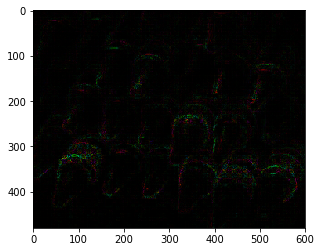

In [40]:
imageorg=load_img("image_set/crayons.jpg")
#imageorg=np.uint8(imageorg)
b2,g2,r2=cv2.split(imageorg)
#by dividing it with 255, the number will be between 1-0 which will be suitable for subtraction and to avoid error
btwo=b2/255
gtwo=g2/255
rtwo=r2/255
bone=b1/255
gone=g1/255
rone=r1/255
bnew=255*((btwo-bone)**2)**.5
gnew=255*((gtwo-gone)**2)**.5
rnew=255*((rtwo-rone)**2)**.5
#to show the difference
new=cv2.merge((bnew,gnew,rnew))
new=np.uint8(new)
display_img(new) 

True

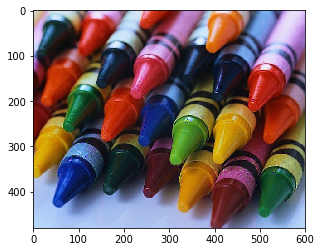

In [41]:
#part two
a=gone-rone
b=bone-rone  
n1 = cv2.medianBlur(a,3) 
n2 = cv2.medianBlur(b,3)
n1=(n1+rd)
n2=(n2+rd)
n1=np.clip(n1,0,1) 
n2=np.clip(n2,0,1)
n1=n1*255
n2=n2*255
n3=rd*255
img2 = cv2.merge((n2,n1,n3))
img2=np.uint8(img2) 
toshow=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(toshow)
cv2.imwrite("b.jpg",img2)

True

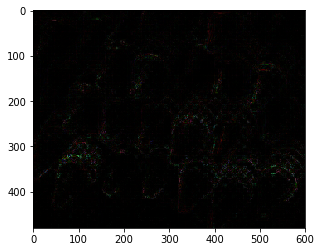

In [42]:
b3=255*((bo-n2/255)**2)**.5
g3=255*((go-n1/255)**2)**.5
r3=255*((ro-rd)**2)**.5
new=cv2.merge((b3,g3,r3))
new=np.uint8(new)
plt.imshow(new)
cv2.imwrite("_OrignalMinusBillFreeMan.bmp",new)